In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [2]:
(x_train, y_train),(x_test , y_test) = mnist.load_data()

x_train.shape

11501568/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

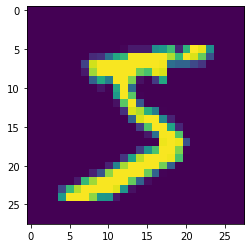

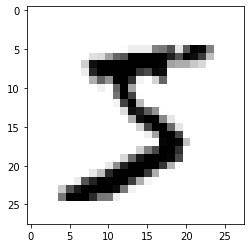

In [3]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0] , cmap = plt.cm.binary)

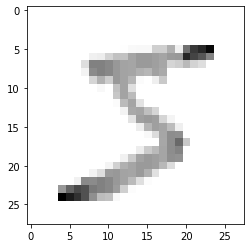

In [4]:
x_train = tf.keras.utils.normalize(x_train , axis = 1)
x_test = tf.keras.utils.normalize(x_test , axis = 1)
plt.imshow(x_train[0] , cmap = plt.cm.binary)

In [5]:
import numpy as np
img_size = 28
x_trainer = np.array(x_train).reshape(-1,img_size,img_size,1)
x_tester = np.array(x_test).reshape(-1,img_size,img_size,1)
print('Training shape' , x_trainer.shape)
print('Testing shape' , x_tester.shape)

Training shape (60000, 28, 28, 1)
Testing shape (10000, 28, 28, 1)


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Activation, Flatten , Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(32 , (3,3) , activation = 'relu' , input_shape= x_trainer.shape[1:]))
# model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64 , (3,3) , activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64 , (3,3) , activation = 'relu'))
# model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [8]:
# compile model that we have created for handwritten digit recognition project
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [10]:
# fit x_trainer , y_train to the model to see accuracy of model:
model.fit(x_trainer,y_train, epochs = 5 , validation_split = 0.3 , batch_size = 128,verbose=1)

Epoch 1/5
329/329 [==============================] - 119s 362ms/step - loss: 0.1288 - accuracy: 0.9614 - val_loss: 0.0737 - val_accuracy: 0.9777
Epoch 2/5
329/329 [==============================] - 119s 361ms/step - loss: 0.0763 - accuracy: 0.9768 - val_loss: 0.0542 - val_accuracy: 0.9844
Epoch 3/5
329/329 [==============================] - 118s 359ms/step - loss: 0.0558 - accuracy: 0.9827 - val_loss: 0.0469 - val_accuracy: 0.9861
Epoch 4/5
329/329 [==============================] - 119s 361ms/step - loss: 0.0452 - accuracy: 0.9852 - val_loss: 0.0460 - val_accuracy: 0.9867
Epoch 5/5
329/329 [==============================] - 119s 362ms/step - loss: 0.0368 - accuracy: 0.9880 - val_loss: 0.0445 - val_accuracy: 0.9876


In [11]:
test_loss, test_acc = model.evaluate(x_tester, y_test)
print('Test loss on 10,000 test samples' , test_loss)
print('Validation Accuracy on 10,000 samples' , test_acc)

313/313 [==============================] - 8s 25ms/step - loss: 0.0379 - accuracy: 0.9887
Test loss on 10,000 test samples 0.037881504744291306
Validation Accuracy on 10,000 samples 0.9886999726295471


6


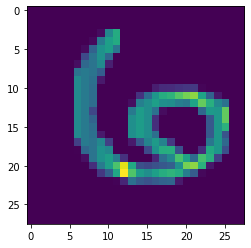

In [12]:
predictions = model.predict([x_tester])

print(np.argmax(predictions[54]))

plt.imshow(x_test[54])

In [13]:
model.save("digit_recogniser_model.h5")

In [22]:
import cv2

img = cv2.imread('3.jpg')
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
resize = cv2.resize(gray,(28,28), interpolation = cv2.INTER_AREA)
new_img = tf.keras.utils.normalize(resize, axis=1)
new_img = np.array(new_img).reshape(-1,img_size,img_size,1)
predictions = model.predict(new_img)
print(np.argmax(predictions))

7
